In [112]:
import pickle
from typing import DefaultDict
import numpy as np

results_file = open('../results/meta_perf_vs_num_train.pkl', 'rb')
all_results = pickle.load(results_file)
results_file.close()

In [113]:
metric = "perc_diff_from_best"

In [114]:
models = ['xgboost', 'random', 'knn']
results_per_model = {model: DefaultDict(list) for model in models}

In [115]:
for dataset in all_results:
    for trial in all_results[dataset]:
        num_train = all_results[dataset][trial]['num_train']
        for model in all_results[dataset][trial]:
            if model == 'num_train': continue
            for n_train, perf in zip(num_train, all_results[dataset][trial][model]):
                results_per_model[model][n_train].append(perf[metric])

In [116]:
for model in models:
    for n_train in range(2, 20, 2):
        assert len(results_per_model[model][n_train]) == 95
        results_per_model[model][n_train] = np.mean(results_per_model[model][n_train])

In [117]:
results_per_model['random']

defaultdict(list,
            {2: 0.46578429820593453,
             4: 0.47875564406701426,
             6: 0.4584239095281768,
             8: 0.4438366830368359,
             10: 0.46681032843671666,
             12: 0.4787080800414606,
             14: 0.49383821372168635,
             16: 0.4517781244111561,
             18: 0.49172529612651894})

In [118]:
import matplotlib.pyplot as plt

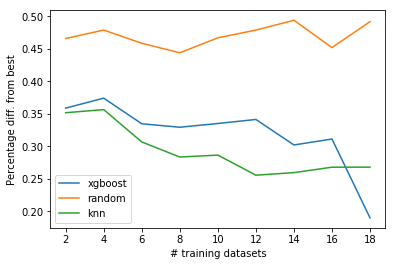

In [119]:
x = [i for i in range(2, 20, 2)]

for model in models:
    y = list(results_per_model[model].values())
    plt.plot(x, y, label = model)
plt.legend()
plt.xlabel('# training datasets')
plt.ylabel('Percentage diff. from best')

plt.savefig('saved_plots/perf_vs_datasets_plot.png', dpi=160)
plt.show()